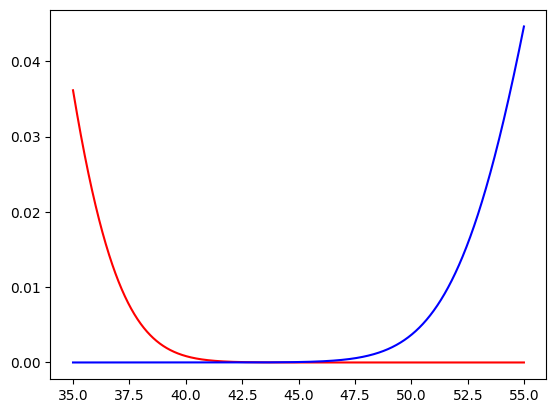

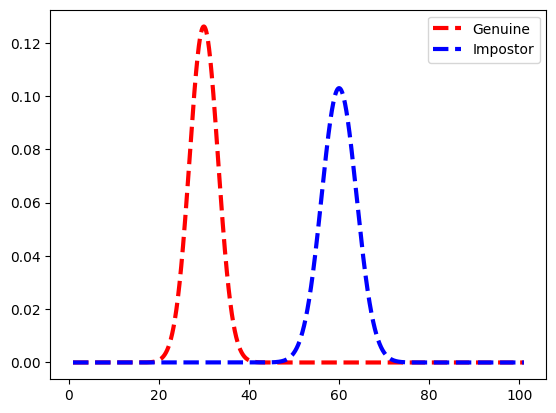

FMR at threshold 50: (1.269813333640366e-10, 4.700738336008938e-12)
FNMR at threshold 50: (0.004911637253759627, 4.859044328493649e-12)
FMR at threshold 75: (2.9734624294617498e-46, 1.5863323549143427e-49)
FNMR at threshold 75: (0.9999462444116354, 1.3311009344324781e-08)


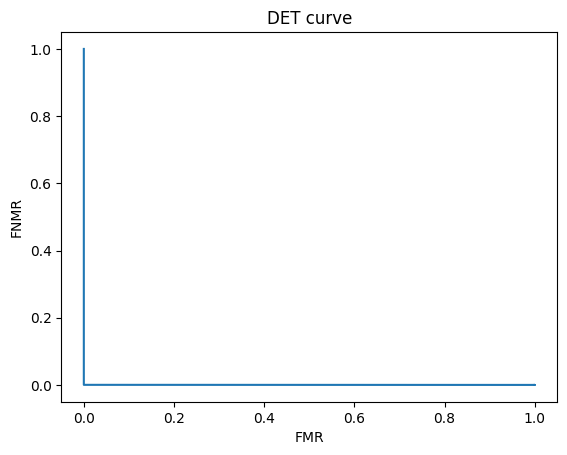

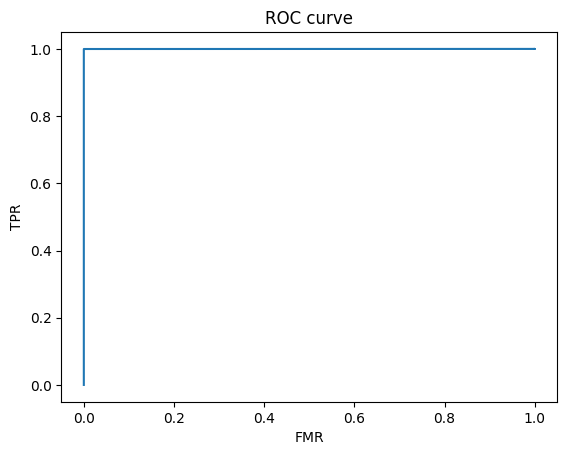

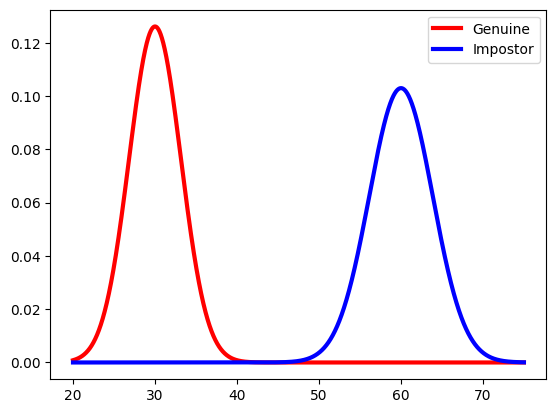

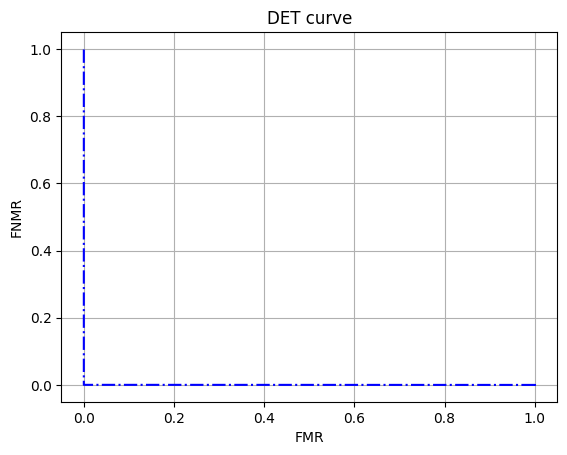

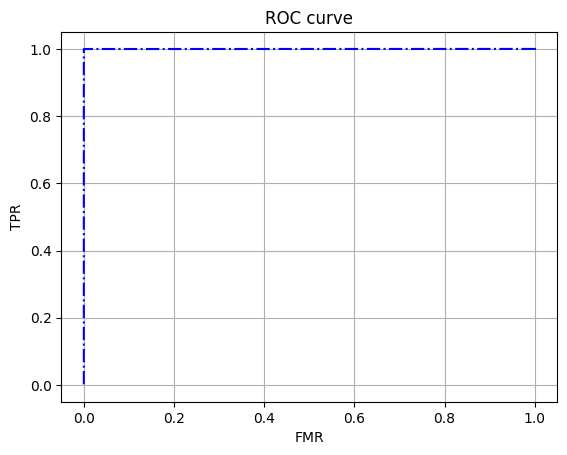

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from scipy.integrate import quad


# For Genuine
mu_g = 30
sigma_g = math.sqrt(10)
var_g = 10


# For Impostor
mu_i = 60
sigma_i = math.sqrt(15)
var_i = 15


x_axis = np.arange(35, 55, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, mu_g, sigma_g), color='red')
plt.plot(x_axis, norm.pdf(x_axis, mu_i, sigma_i), color='blue')
plt.show()


x_axis = np.arange(1, 101, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, mu_g, sigma_g), color='red', label='Genuine', linestyle='--', linewidth = 3)
plt.plot(x_axis, norm.pdf(x_axis, mu_i, sigma_i), color='blue', label='Impostor', linestyle='--', linewidth = 3)
plt.legend()
plt.show()




# Gaussian Function
def univariate_gaussian(x, mean, variance):
    exp_term = -0.5 * ((x - mean) ** 2) / variance
    coeff = 1 / np.sqrt(2 * np.pi * variance)
    return coeff * np.exp(exp_term)




# FMR and FNMR at Threshold = 50
th = 50
mean = mu_g
variance = sigma_g ** 2
fmr = quad(univariate_gaussian, th, np.inf, args=(mean, variance))
print(f"FMR at threshold 50: {fmr}")


mean = mu_i
variance = sigma_i ** 2
fnmr = quad(univariate_gaussian, -np.inf, th, args=(mean, variance))
print(f"FNMR at threshold 50: {fnmr}")




# FMR and FNMR at Threshold = 75
th = 75
mean = mu_g
variance = sigma_g ** 2
fmr = quad(univariate_gaussian, th, np.inf, args=(mean, variance))
print(f"FMR at threshold 75: {fmr}")


mean = mu_i
variance = sigma_i ** 2
fnmr = quad(univariate_gaussian, -np.inf, th, args=(mean, variance))
print(f"FNMR at threshold 75: {fnmr}")






# DET Curve
fnmrlst = []
fmrlst = []
thlst = np.arange(1, 101, 0.5)


for i in thlst:
    fmr = quad(univariate_gaussian, i, np.inf, args=(mu_g, var_g))
    fmrlst.append(fmr[0])


    fnmr = quad(univariate_gaussian, -np.inf, i, args=(mu_i, var_i))
    fnmrlst.append(fnmr[0])


plt.plot(fmrlst, fnmrlst)
plt.title('DET curve')
plt.xlabel('FMR')
plt.ylabel('FNMR')
plt.show()


# ROC Curve
tprlst = []
for i in thlst:
    tpr = quad(univariate_gaussian, i, np.inf, args=(mu_i, var_i))
    tprlst.append(tpr[0])


plt.plot(fmrlst, tprlst)
plt.title('ROC curve')
plt.xlabel('FMR')
plt.ylabel('TPR')
plt.show()




# Plot All Distributions
x_axis = np.arange(20, 75, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, mu_g, sigma_g), color='red', label='Genuine', linewidth=3)
plt.plot(x_axis, norm.pdf(x_axis, mu_i, sigma_i), color='blue', label='Impostor', linewidth=3)


plt.legend()
plt.show()




plt.plot(fmrlst, fnmrlst, color='blue', linestyle='-.')

plt.title('DET curve')
plt.xlabel('FMR')
plt.ylabel('FNMR')
plt.grid()

plt.show()




plt.plot(fmrlst, tprlst, color='blue', linestyle='-.')

plt.title('ROC curve')
plt.xlabel('FMR')
plt.ylabel('TPR')
plt.grid()

plt.show()



